/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       1.00      1.00      1.00         6
           2       0.86      0.67      0.75         9
           3       1.00      1.00      1.00        12

    accuracy                           0.89        36
   macro avg       0.90      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36

AUC for Class 1: 0.9012345679012345
AUC for Class 2: 1.0
AUC for Class 3: 0.9670781893004115
AUC for Class 4: 1.0


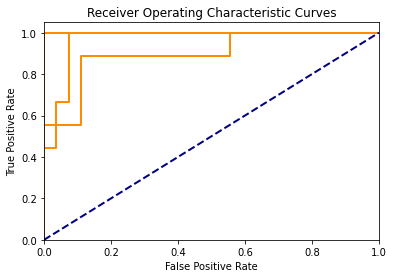

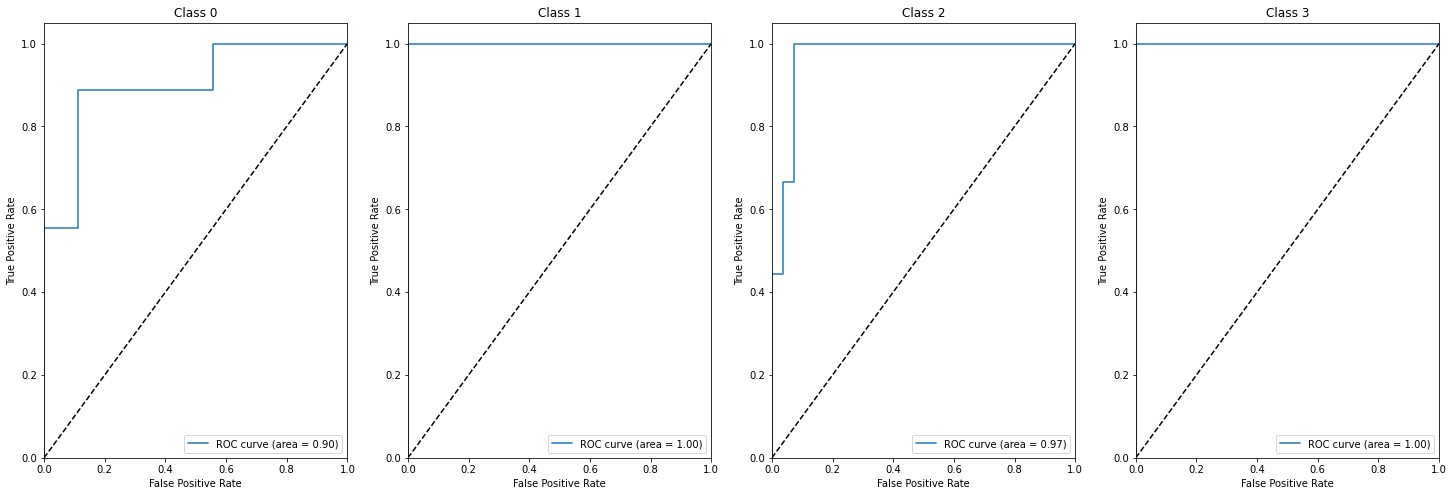

roc_auc_score:  0.9670781893004115


In [41]:
#모델 로드

import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import label_binarize
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN

# fix random seed for reproducibility

seed = 0
np.random.seed(seed)

# load dataset

df = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2_MORDRED(3D)_apppendscore_dropsmiles.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2add_MORDRED(3D)_apppendscore_dropsmiles.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Others_MORDRED(3D)_appendscore_dropsmiles.csv')
df3 = pd.concat([df,df1,df2])
data = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Drug_MORDRED(3D)_appendscore_dropsmiles.csv')

#데이터 분류
#dataset = df.values
#X = dataset[:,:-1]
#Y = dataset[:,-1]

#dataset2 = df2.values
#X_ex = dataset2[:,:-1]
#Y_ex = dataset2[:,-1]

dataset3 = df3.values
X = dataset3[:,:-1]
Y = dataset3[:,-1]

data = data.values
X_others =data[:,:-1]
Y_others =data[:,-1]

#복합샘플링

randomover = RandomOverSampler(random_state=seed)
X_re, Y_re = randomover.fit_resample(X, Y)

#ada = ADASYN(random_state=seed)
#X_re1, Y_re1 = ada.fit_resample(X_re, Y_re)

#smote = SMOTE(random_state=seed)
#X_re2, Y_re2 = smote.fit_resample(X_re1, Y_re1)

smoteenn = SMOTEENN(enn=EditedNearestNeighbours(n_neighbors=2), random_state=seed)
X_re, Y_re = smoteenn.fit_resample(X_re, Y_re)

#데이터 표준화

Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_re)
X_others_scaled = Scaler.transform(X_others)

#데이터 split

train_input, test_input, train_target, test_target = train_test_split(X_scaled, Y_re, test_size=0.2, random_state=seed)

##load model

loaded_model = joblib.load('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/FINAL/VRK2_RandomForest0430.pkl')

##Classification report

pred = loaded_model.predict(test_input)

print(classification_report(test_target, pred, labels=[0,1,2,3]))

##ROC-AUC

test_score = loaded_model.predict_proba(test_input)

#Binarize the output
y_test_bin = label_binarize(test_target, classes=[0,1,2,3])
n_classes = y_test_bin.shape[1] #출력값 4

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(25, 8))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(141+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test_bin, test_score))
